## Cache Plots

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_core_marker=False):
    rcParams['figure.figsize'] = 11.7,8.27
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    plot.set(xlabel=p_xId, ylabel=p_yId)
    plt.grid(True,which="both",ls="--",c='lightgray') 

    if(p_core_marker == True):
        plt.axvline(64, linestyle='--', color='red')

    plt.figure(figsize=(1, 1), dpi=80)
    plt.show()

### Gauss3

#### Efficiency by Threads

##### [1024 x 1024 x 1024]

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_18239/3544848389.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.impl_id == 'one_coeff'][data_frame.threads == 1]['runtime'].values[0]


node_id                 bench_id                impl_id region_id  \
0   gauss3  e_efficiency_by_threads              one_coeff     apply   
2   gauss3  e_efficiency_by_threads              one_coeff     apply   
4   gauss3  e_efficiency_by_threads              one_coeff     apply   
6   gauss3  e_efficiency_by_threads              one_coeff     apply   
8   gauss3  e_efficiency_by_threads              one_coeff     apply   
10  gauss3  e_efficiency_by_threads              one_coeff     apply   
12  gauss3  e_efficiency_by_threads              one_coeff     apply   
14  gauss3  e_efficiency_by_threads              one_coeff     apply   
16  gauss3  e_efficiency_by_threads          several_coeff     apply   
18  gauss3  e_efficiency_by_threads          several_coeff     apply   
20  gauss3  e_efficiency_by_threads          several_coeff     apply   
22  gauss3  e_efficiency_by_threads          several_coeff     apply   
24  gauss3  e_efficiency_by_threads          several_coeff     apply   
26  gauss3  e_efficiency_by_threads          several_coeff     apply   
28  gauss3  e_efficiency_by_threads          several_coeff     apply   
30  gauss3  e_efficiency_by_threads          several_coeff     apply   
32  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
34  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
36  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
38  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
40  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
42  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
44  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
46  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
0   gauss3  e_efficiency_by_threads              one_coeff     apply   
2   gauss3  e_efficiency_by_threads              one_coeff     apply   
4   gauss3  e_efficiency_by_threads              one_coeff     apply   
6   gauss3  e_efficiency_by_threads              one_coeff     apply   
8   gauss3  e_efficiency_by_threads              one_coeff     apply   
10  gauss3  e_efficiency_by_threads              one_coeff     apply   
12  gauss3  e_efficiency_by_threads              one_coeff     apply   
14  gauss3  e_efficiency_by_threads              one_coeff     apply   
16  gauss3  e_efficiency_by_threads          several_coeff     apply   
18  gauss3  e_efficiency_by_threads          several_coeff     apply   
20  gauss3  e_efficiency_by_threads          several_coeff     apply   
22  gauss3  e_efficiency_by_threads          several_coeff     apply   
24  gauss3  e_efficiency_by_threads          several_coeff     apply   
26  gauss3  e_efficiency_by_threads          several_coeff     apply   
28  gauss3  e_efficiency_by_threads          several_coeff     apply   
30  gauss3  e_efficiency_by_threads          several_coeff     apply   
32  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
34  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
36  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
38  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
40  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
42  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
44  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
46  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   

    obj_cols  obj_rows  obj_levels  threads   runtime  efficiency  \
0       1024      1024        1024        1  1.585850    1.000000   
2       1024      1024        1024        2  0.794530    0.997980   
4       1024      1024        1024        4  0.406782    0.974631   
6       1024      1024        1024        8  0.221960    0.893094   
8       1024      1024        1024       16  0.179862    0.551065   
10      1024      1024        1024       32  0.183830    0.2

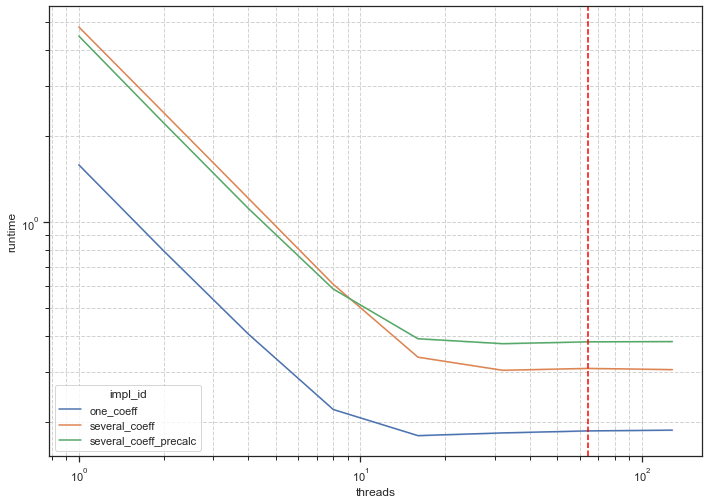

<Figure size 80x80 with 0 Axes>

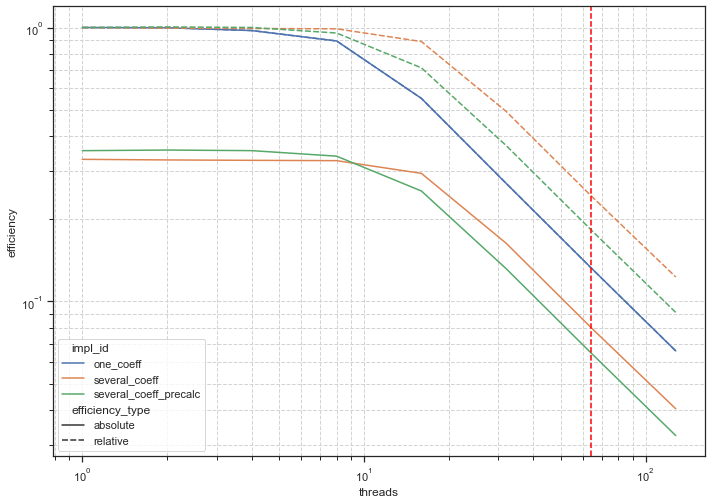

<Figure size 80x80 with 0 Axes>

In [2]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads.csv')

data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1024]
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.impl_id == 'one_coeff'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)

display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='efficiency_type',
    p_logScale=True,
    p_core_marker=True)

##### [1600 x 1600 x 1600]

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_18239/2555012791.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.impl_id == 'one_coeff'][data_frame.threads == 1]['runtime'].values[0]


node_id                 bench_id                impl_id region_id  \
48  gauss3  e_efficiency_by_threads              one_coeff     apply   
50  gauss3  e_efficiency_by_threads              one_coeff     apply   
52  gauss3  e_efficiency_by_threads              one_coeff     apply   
54  gauss3  e_efficiency_by_threads              one_coeff     apply   
56  gauss3  e_efficiency_by_threads              one_coeff     apply   
58  gauss3  e_efficiency_by_threads              one_coeff     apply   
60  gauss3  e_efficiency_by_threads              one_coeff     apply   
62  gauss3  e_efficiency_by_threads              one_coeff     apply   
64  gauss3  e_efficiency_by_threads          several_coeff     apply   
66  gauss3  e_efficiency_by_threads          several_coeff     apply   
68  gauss3  e_efficiency_by_threads          several_coeff     apply   
70  gauss3  e_efficiency_by_threads          several_coeff     apply   
72  gauss3  e_efficiency_by_threads          several_coeff     apply   
74  gauss3  e_efficiency_by_threads          several_coeff     apply   
76  gauss3  e_efficiency_by_threads          several_coeff     apply   
78  gauss3  e_efficiency_by_threads          several_coeff     apply   
80  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
82  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
84  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
86  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
88  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
90  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
92  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
94  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
48  gauss3  e_efficiency_by_threads              one_coeff     apply   
50  gauss3  e_efficiency_by_threads              one_coeff     apply   
52  gauss3  e_efficiency_by_threads              one_coeff     apply   
54  gauss3  e_efficiency_by_threads              one_coeff     apply   
56  gauss3  e_efficiency_by_threads              one_coeff     apply   
58  gauss3  e_efficiency_by_threads              one_coeff     apply   
60  gauss3  e_efficiency_by_threads              one_coeff     apply   
62  gauss3  e_efficiency_by_threads              one_coeff     apply   
64  gauss3  e_efficiency_by_threads          several_coeff     apply   
66  gauss3  e_efficiency_by_threads          several_coeff     apply   
68  gauss3  e_efficiency_by_threads          several_coeff     apply   
70  gauss3  e_efficiency_by_threads          several_coeff     apply   
72  gauss3  e_efficiency_by_threads          several_coeff     apply   
74  gauss3  e_efficiency_by_threads          several_coeff     apply   
76  gauss3  e_efficiency_by_threads          several_coeff     apply   
78  gauss3  e_efficiency_by_threads          several_coeff     apply   
80  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
82  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
84  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
86  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
88  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
90  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
92  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   
94  gauss3  e_efficiency_by_threads  several_coeff_precalc     apply   

    obj_cols  obj_rows  obj_levels  threads    runtime  efficiency  \
48      1600      1600        1600        1   5.678280    1.000000   
50      1600      1600        1600        2   2.995710    0.947735   
52      1600      1600        1600        4   1.442750    0.983933   
54      1600      1600        1600        8   0.777875    0.912467   
56      1600      1600        1600       16   0.679733    0.522106   
58      1600      1600        1600       32   0.694812

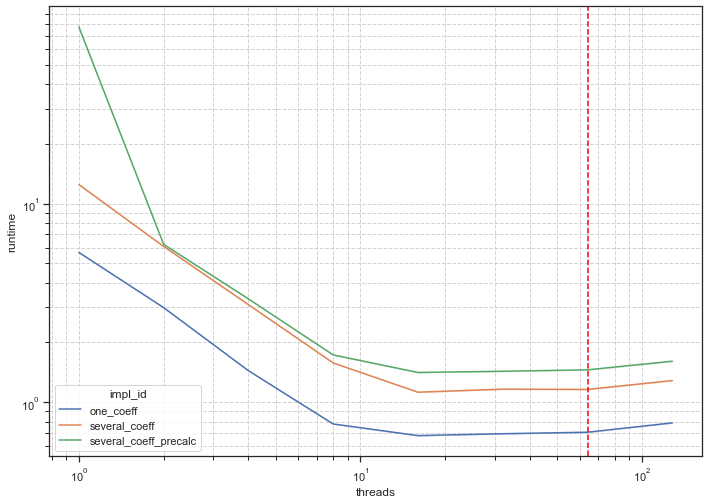

<Figure size 80x80 with 0 Axes>

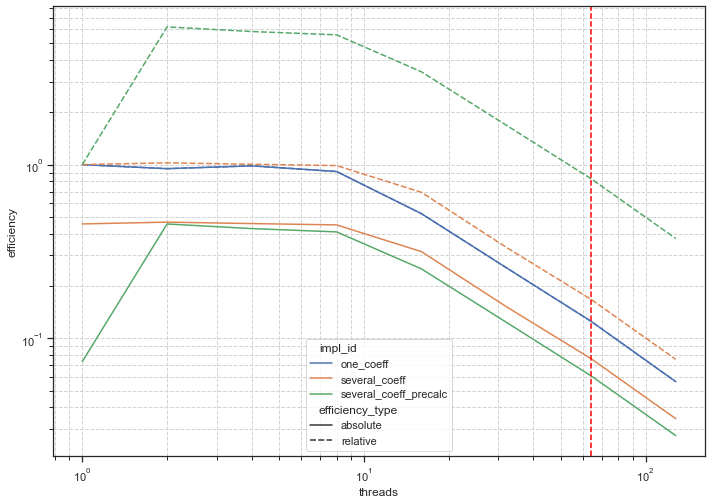

<Figure size 80x80 with 0 Axes>

In [3]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_by_threads.csv')

data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1600]
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.impl_id == 'one_coeff'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)

display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='efficiency_type',
    p_logScale=True,
    p_core_marker=True)

#### Runtime By Cells

##### One Threads

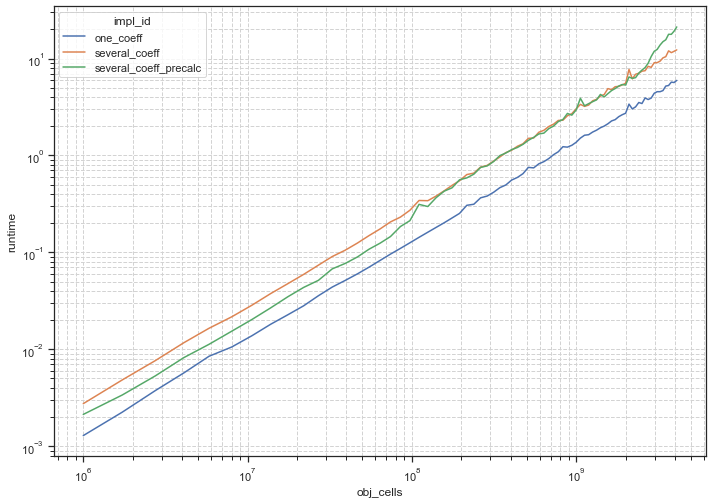

<Figure size 80x80 with 0 Axes>

In [4]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_runtime_by_cells.csv')
data_frame = data_frame[data_frame.threads == 1]
data_frame = data_frame[data_frame.region_id == 'apply']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)

##### Multiple Threads

node_id            bench_id                impl_id region_id  obj_cols  \
456  gauss3  e_runtime_by_cells              one_coeff     apply       100   
458  gauss3  e_runtime_by_cells              one_coeff     apply       120   
460  gauss3  e_runtime_by_cells              one_coeff     apply       140   
462  gauss3  e_runtime_by_cells              one_coeff     apply       160   
464  gauss3  e_runtime_by_cells              one_coeff     apply       180   
..      ...                 ...                    ...       ...       ...   
902  gauss3  e_runtime_by_cells  several_coeff_precalc     apply      1520   
904  gauss3  e_runtime_by_cells  several_coeff_precalc     apply      1540   
906  gauss3  e_runtime_by_cells  several_coeff_precalc     apply      1560   
908  gauss3  e_runtime_by_cells  several_coeff_precalc     apply      1580   
910  gauss3  e_runtime_by_cells  several_coeff_precalc     apply      1600   

     obj_rows  obj_levels   obj_cells  threads   runtime  
456       100         100     1000000      128  0.000432  
458       120         120     1728000      128  0.000731  
460       140         140     2744000      128  0.001327  
462       160         160     4096000      128  0.002167  
464       180         180     5832000      128  0.005640  
..        ...         ...         ...      ...       ...  
902      1520        1520  3511808000      128  1.284690  
904      1540        1540  3652264000      128  1.324220  
906      1560        1560  3796416000      128  1.413300  
908      1580        1580  3944312000      128  1.455260  
910      1600        1600  4096000000      128  1.610540  

[228 rows x 10 columns]

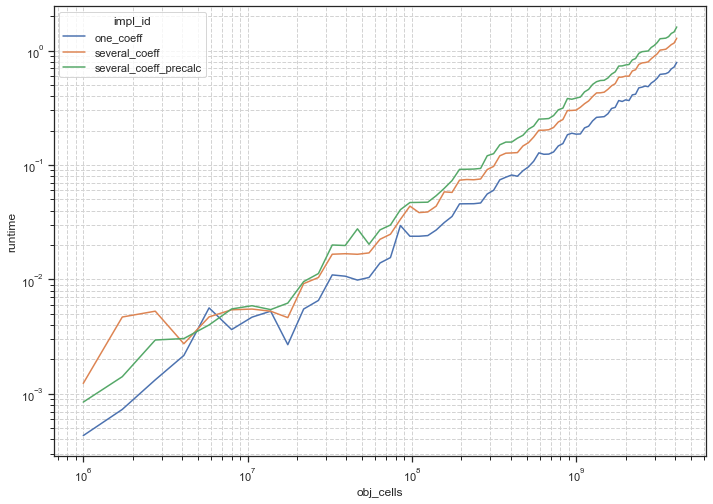

<Figure size 80x80 with 0 Axes>

In [14]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_runtime_by_cells.csv')
data_frame = data_frame[data_frame.threads != 1]
data_frame = data_frame[data_frame.region_id == 'apply']

display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)

#### Memory By Cells

##### One Thread All

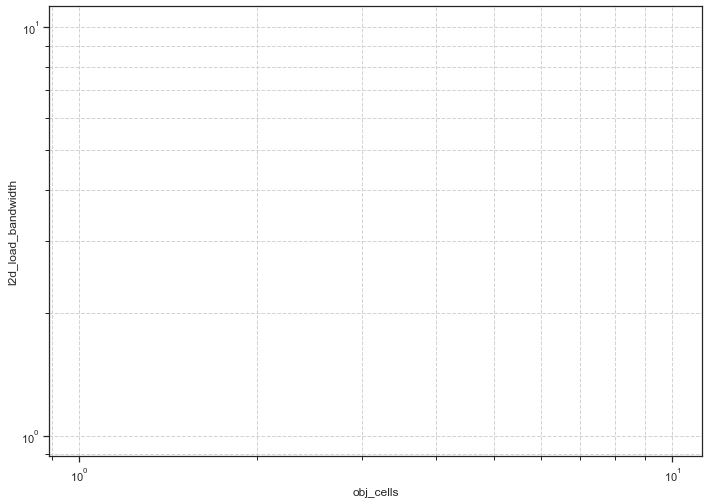

<Figure size 80x80 with 0 Axes>

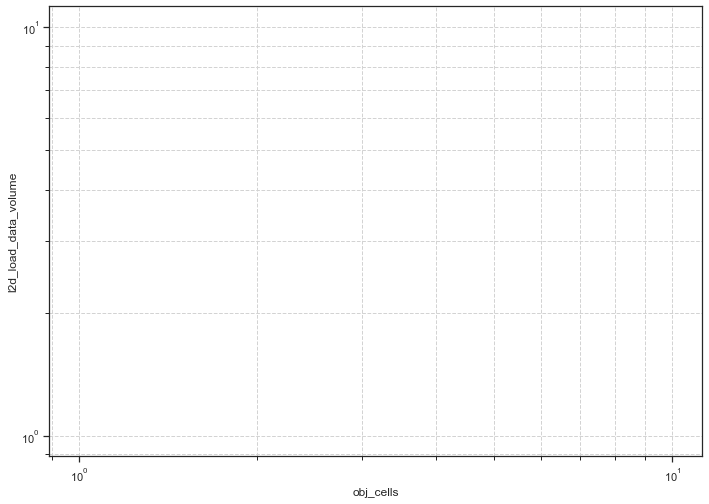

<Figure size 80x80 with 0 Axes>

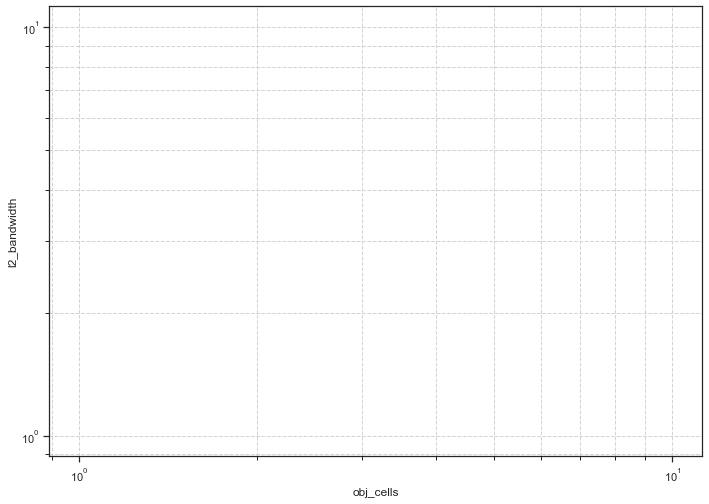

<Figure size 80x80 with 0 Axes>

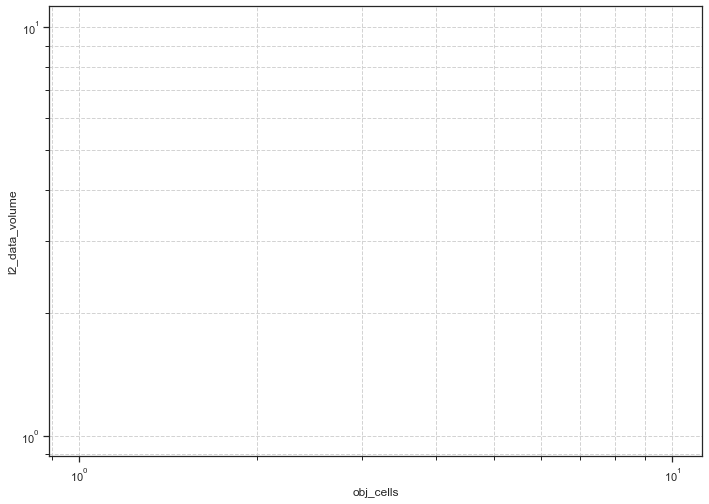

<Figure size 80x80 with 0 Axes>

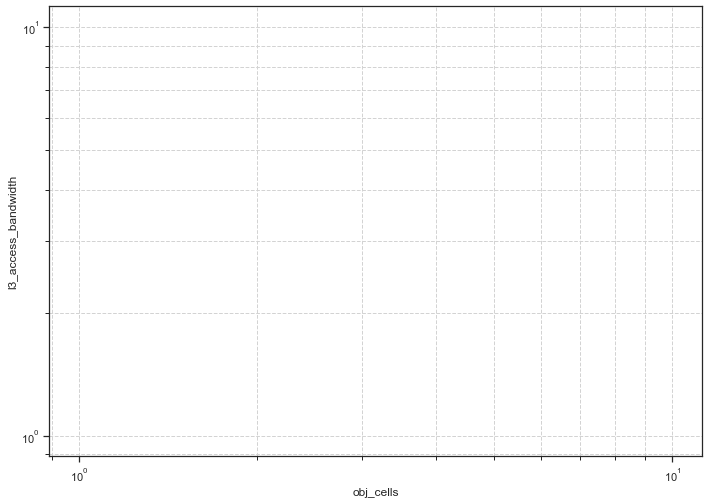

<Figure size 80x80 with 0 Axes>

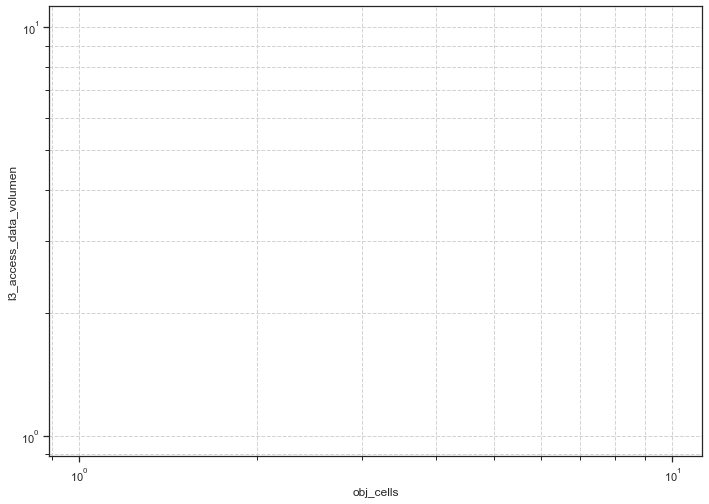

<Figure size 80x80 with 0 Axes>

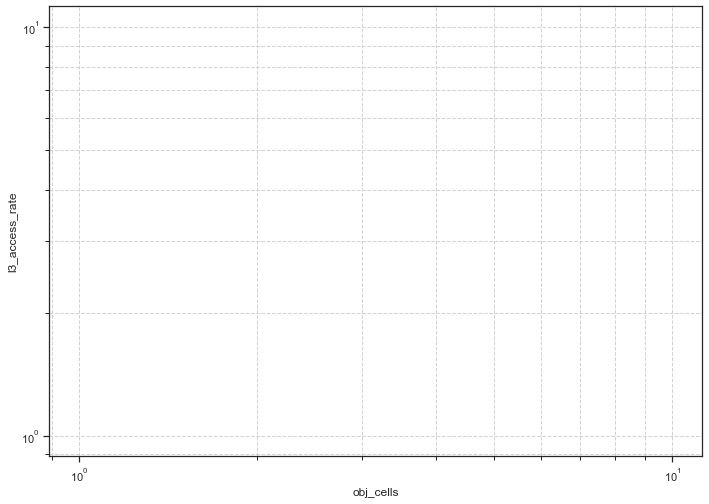

<Figure size 80x80 with 0 Axes>

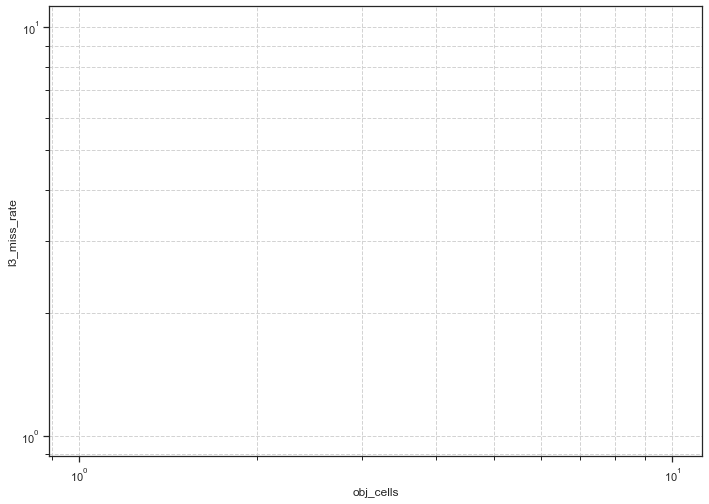

<Figure size 80x80 with 0 Axes>

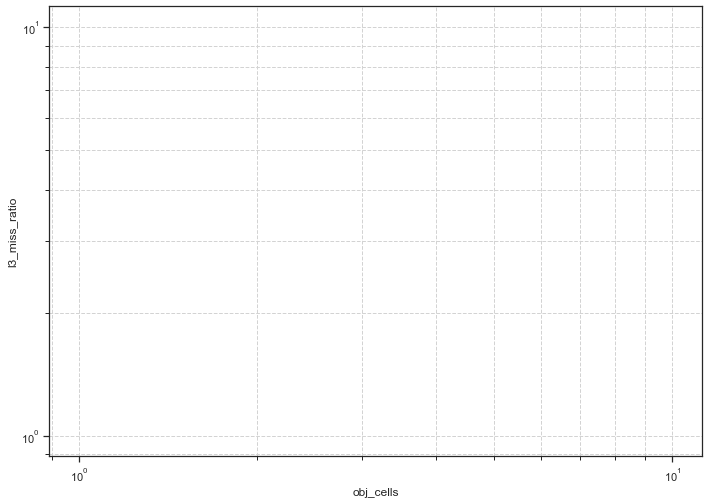

<Figure size 80x80 with 0 Axes>

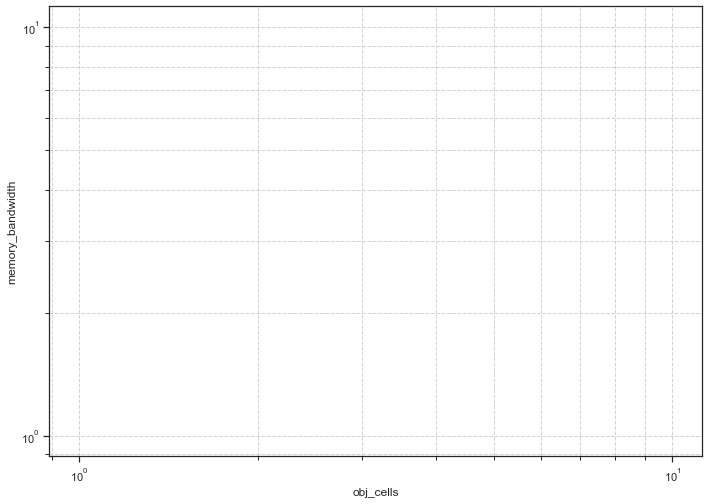

<Figure size 80x80 with 0 Axes>

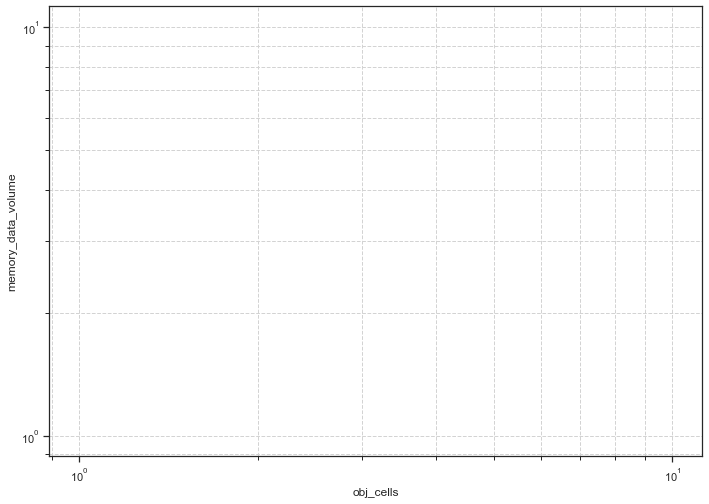

<Figure size 80x80 with 0 Axes>

In [6]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_cells.csv')
data_frame = data_frame[data_frame.threads == 1]
plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)

##### One Tread apply

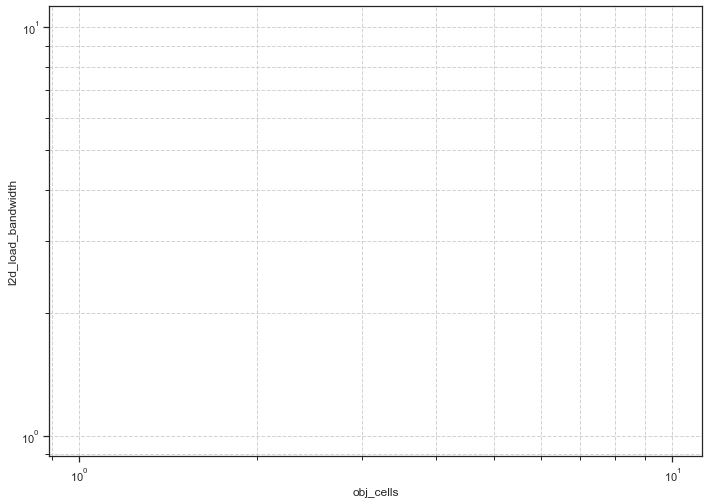

<Figure size 80x80 with 0 Axes>

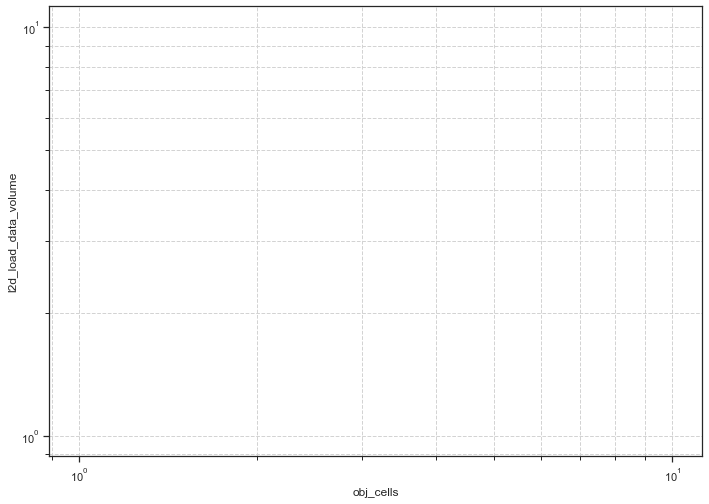

<Figure size 80x80 with 0 Axes>

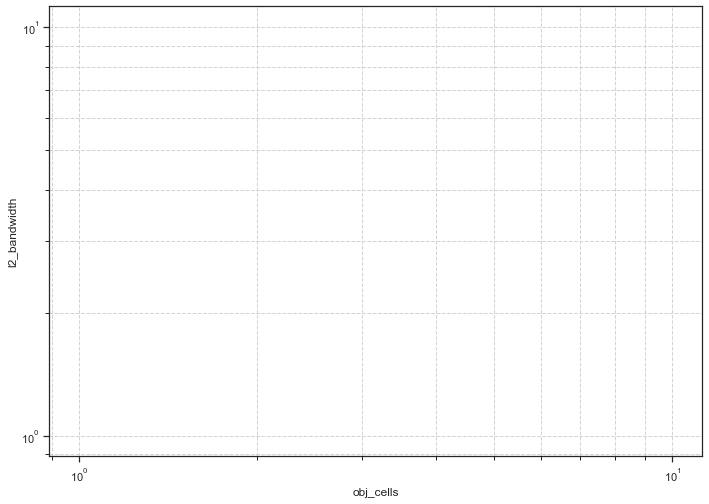

<Figure size 80x80 with 0 Axes>

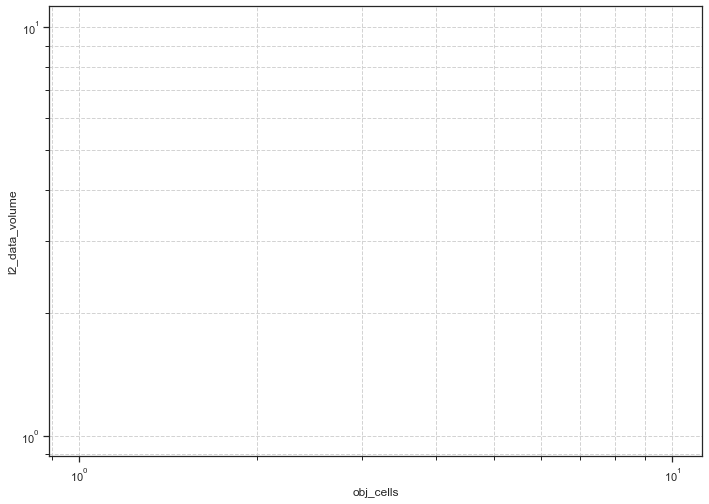

<Figure size 80x80 with 0 Axes>

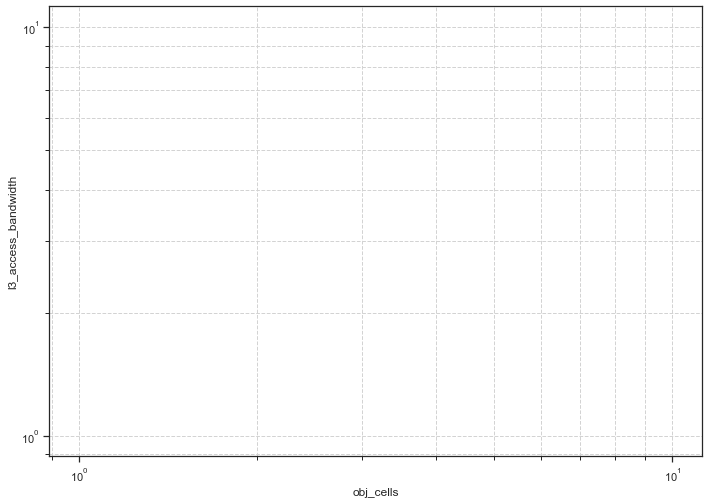

<Figure size 80x80 with 0 Axes>

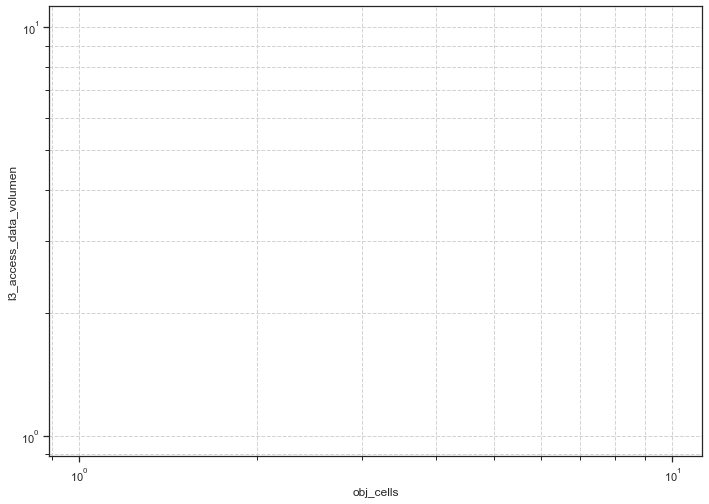

<Figure size 80x80 with 0 Axes>

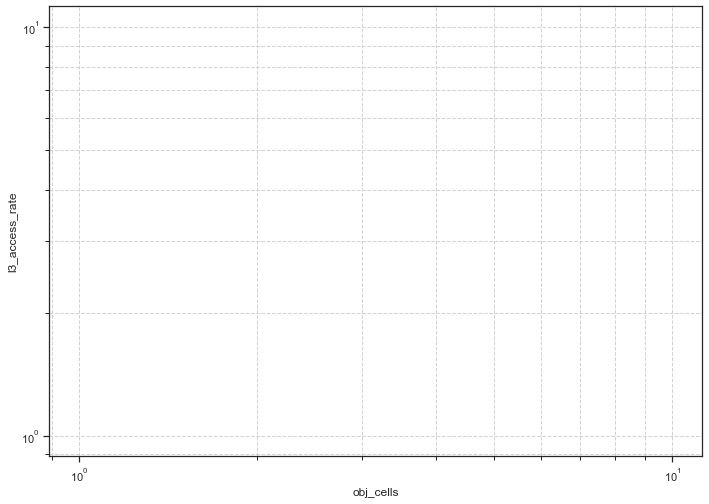

<Figure size 80x80 with 0 Axes>

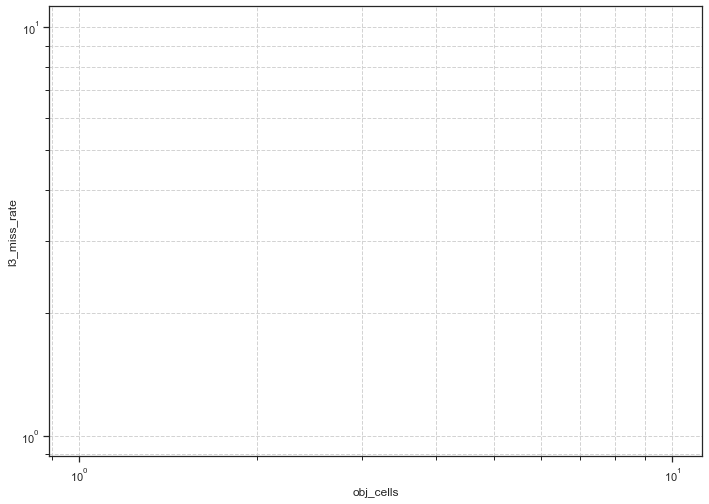

<Figure size 80x80 with 0 Axes>

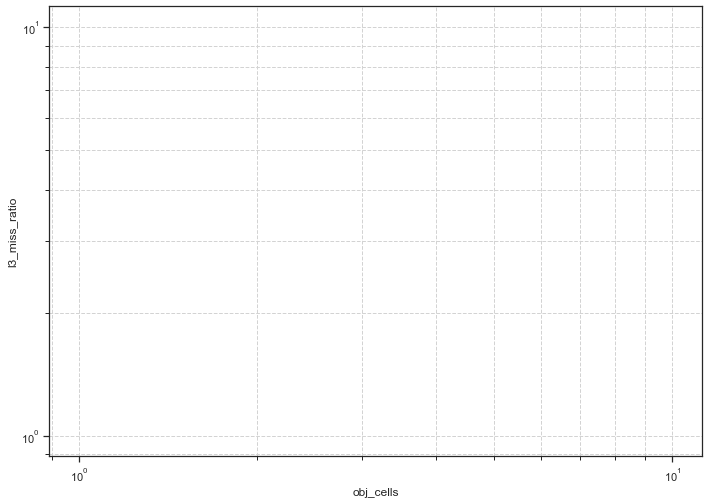

<Figure size 80x80 with 0 Axes>

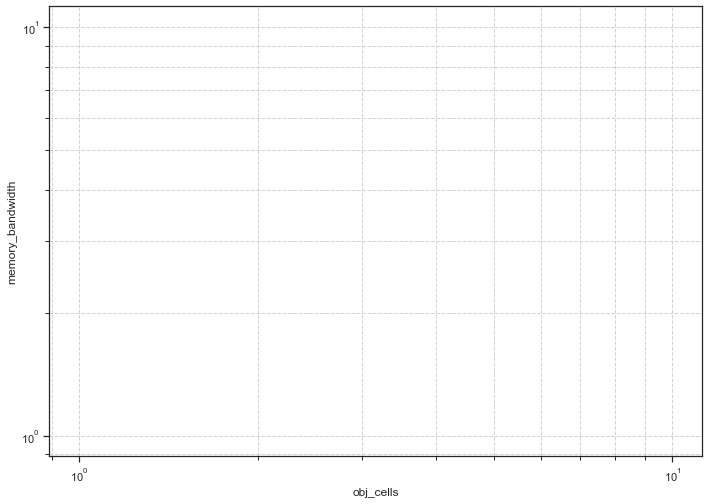

<Figure size 80x80 with 0 Axes>

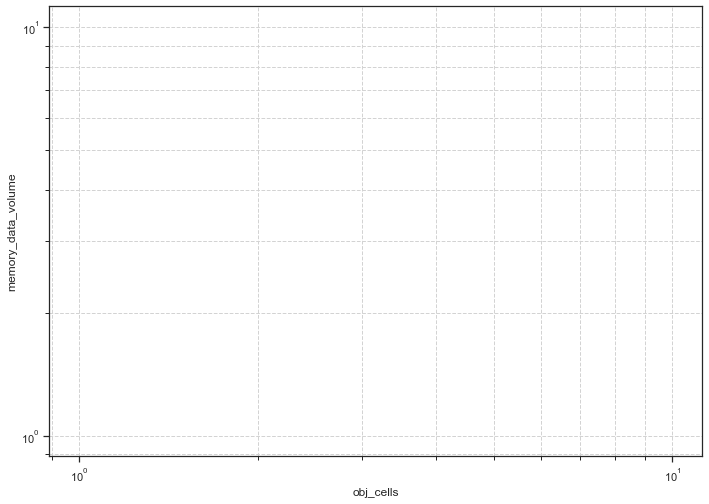

<Figure size 80x80 with 0 Axes>

In [7]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_cells.csv')
data_frame = data_frame[data_frame.threads == 1]
data_frame = data_frame[data_frame.region_id == 'apply']
plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)

##### multiple Threads all

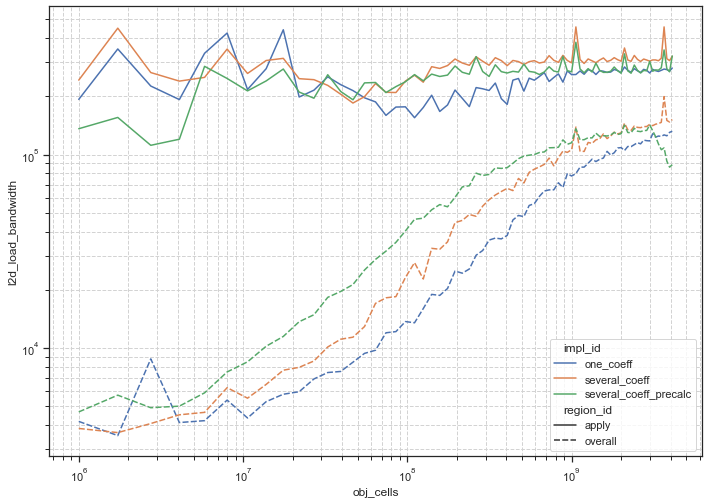

<Figure size 80x80 with 0 Axes>

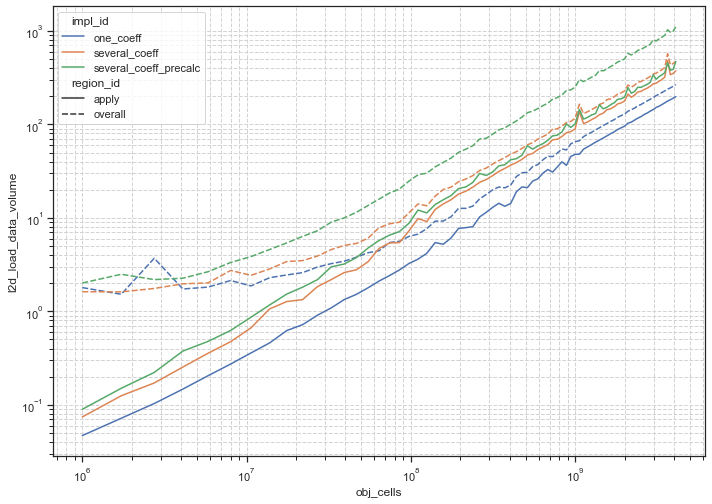

<Figure size 80x80 with 0 Axes>

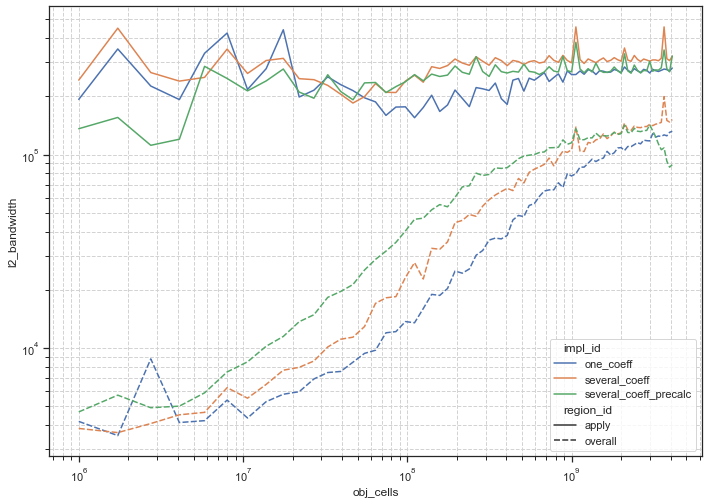

<Figure size 80x80 with 0 Axes>

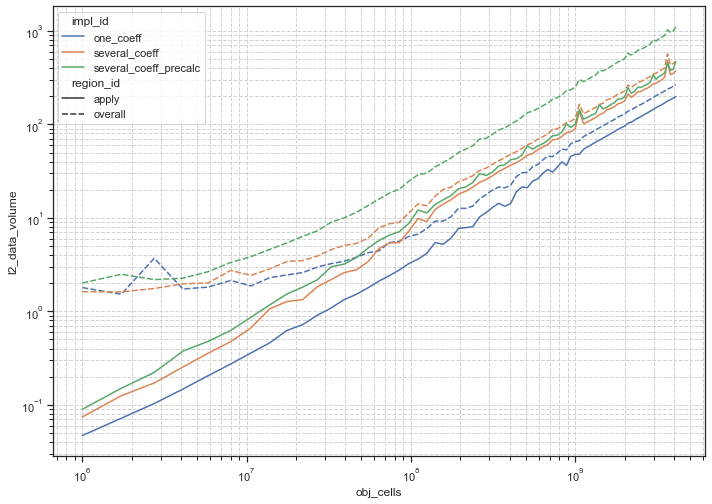

<Figure size 80x80 with 0 Axes>

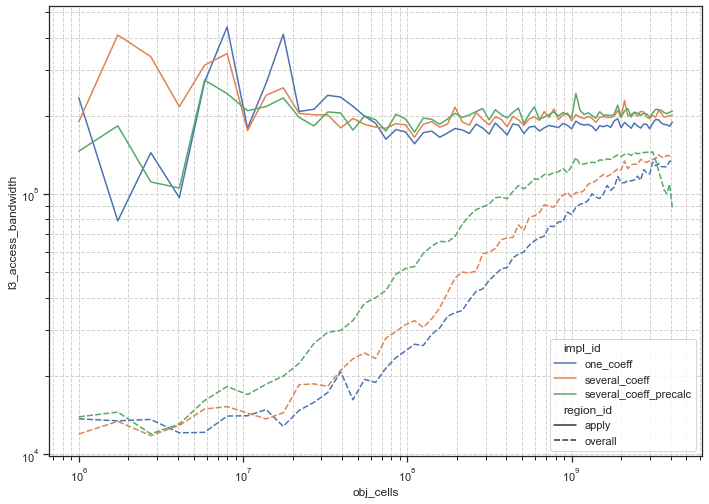

<Figure size 80x80 with 0 Axes>

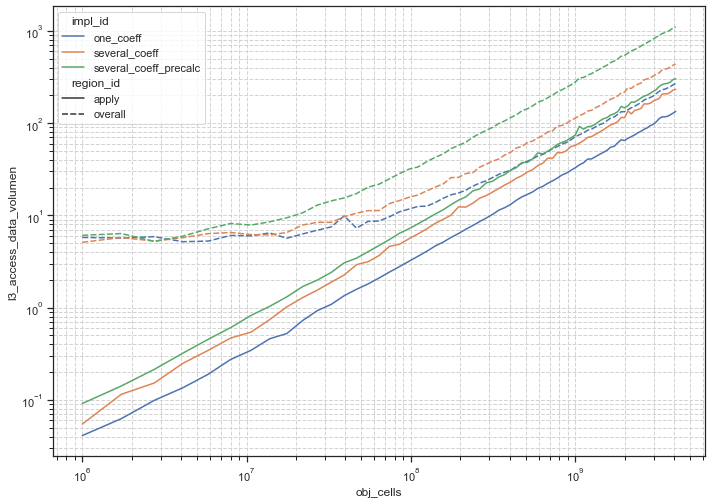

<Figure size 80x80 with 0 Axes>

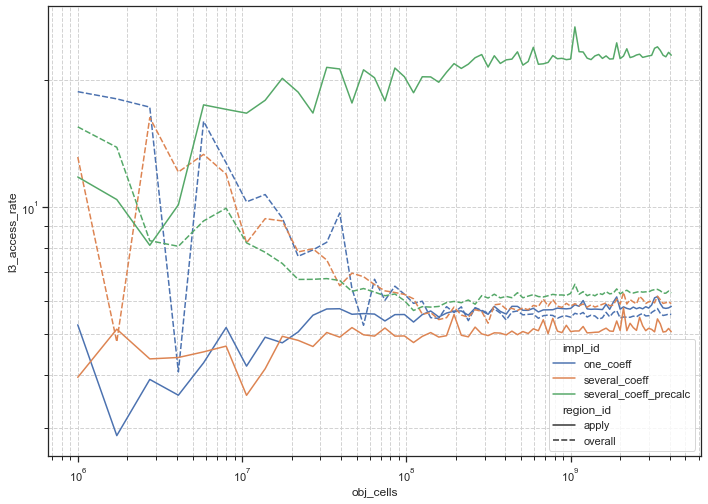

<Figure size 80x80 with 0 Axes>

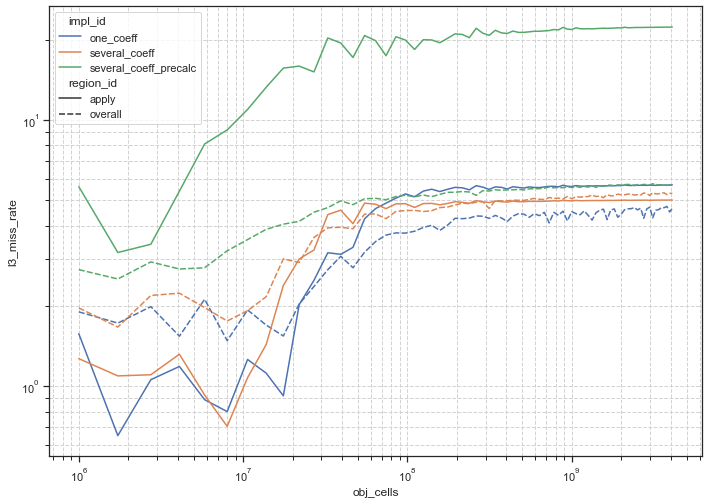

<Figure size 80x80 with 0 Axes>

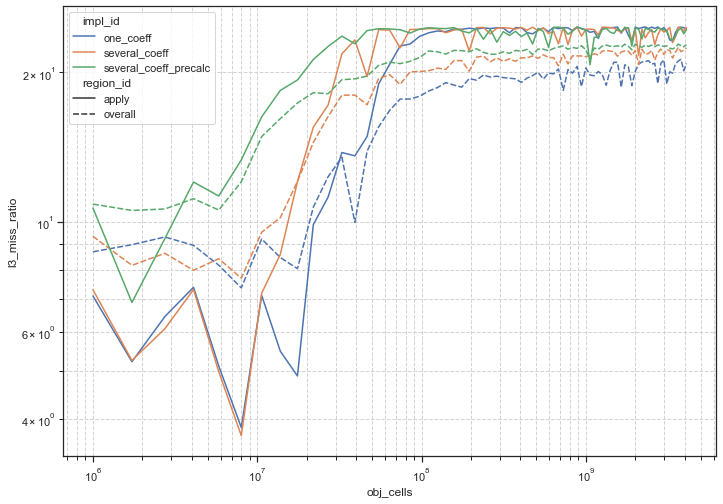

<Figure size 80x80 with 0 Axes>

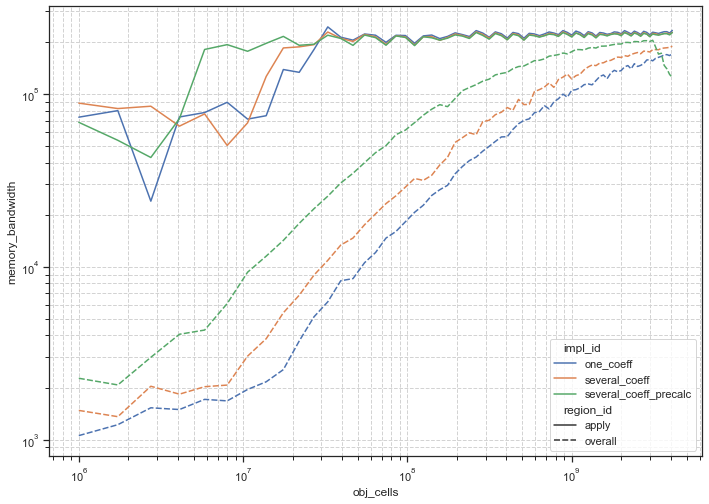

<Figure size 80x80 with 0 Axes>

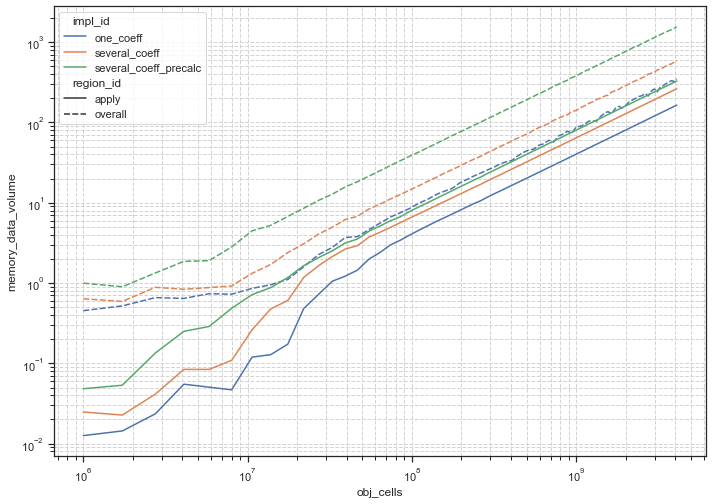

<Figure size 80x80 with 0 Axes>

In [8]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_cells.csv')
data_frame = data_frame[data_frame.threads != 1]
plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId='region_id',
    p_logScale=True)

##### Multiple Threads apply

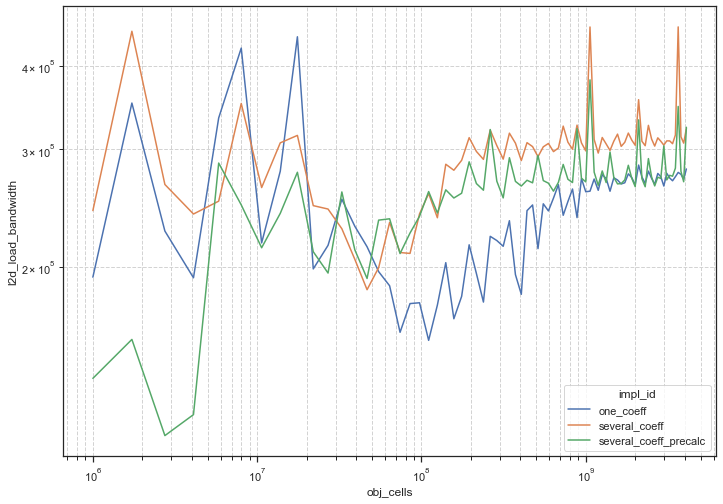

<Figure size 80x80 with 0 Axes>

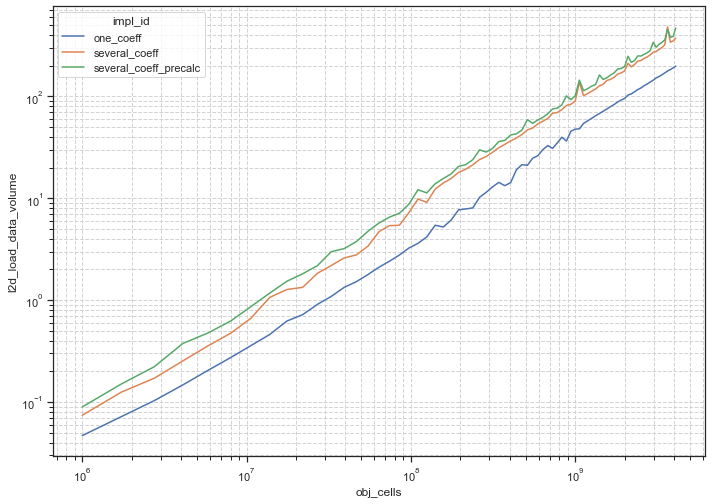

<Figure size 80x80 with 0 Axes>

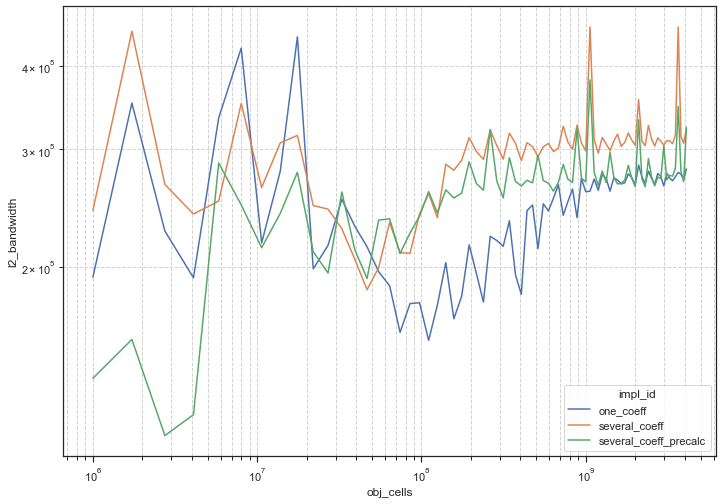

<Figure size 80x80 with 0 Axes>

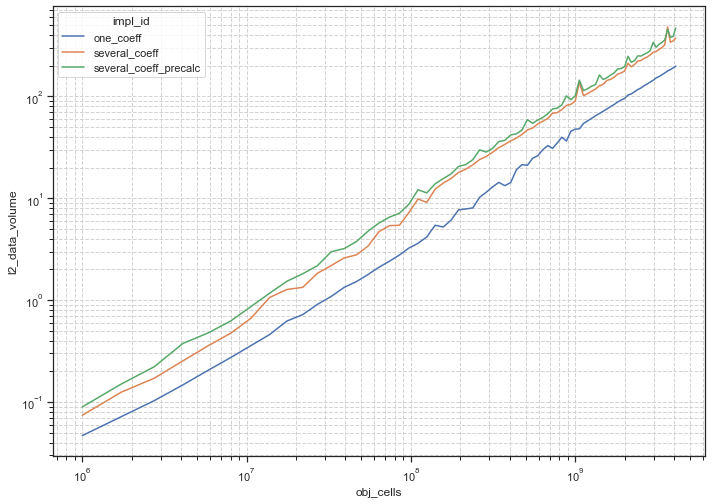

<Figure size 80x80 with 0 Axes>

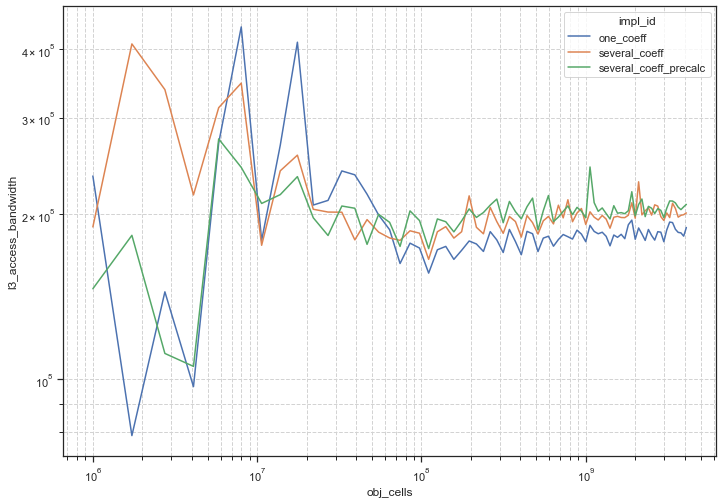

<Figure size 80x80 with 0 Axes>

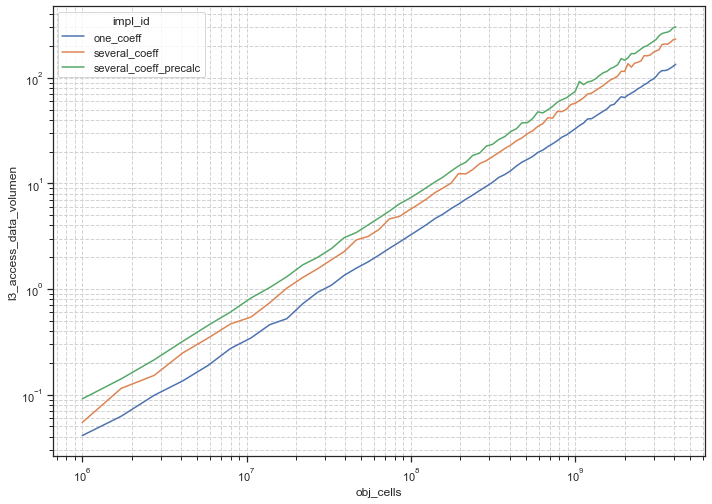

<Figure size 80x80 with 0 Axes>

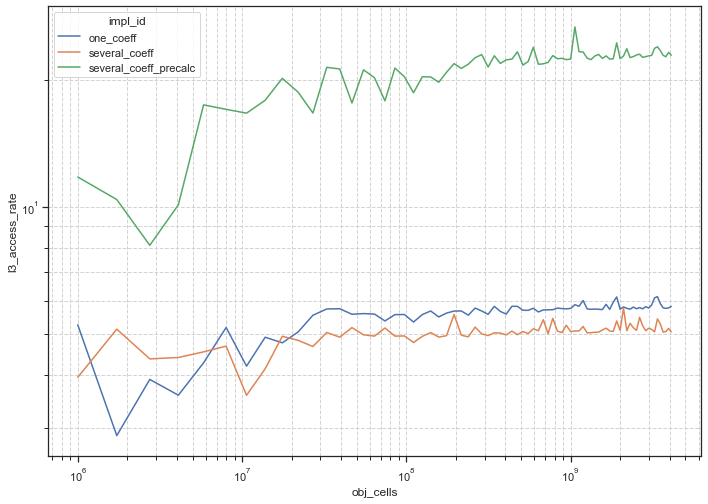

<Figure size 80x80 with 0 Axes>

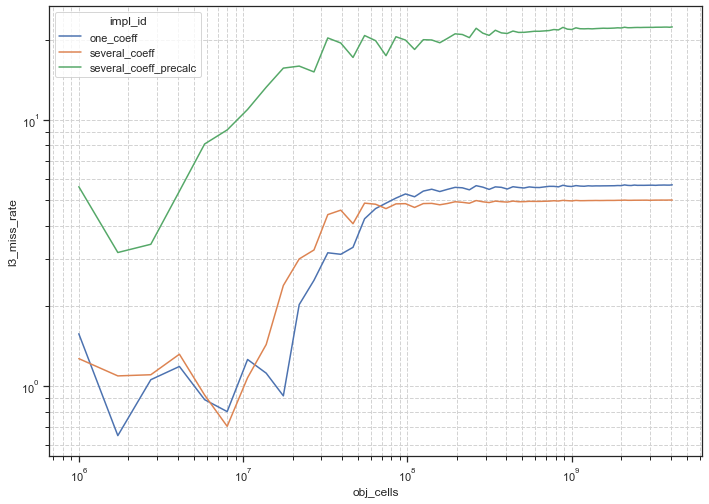

<Figure size 80x80 with 0 Axes>

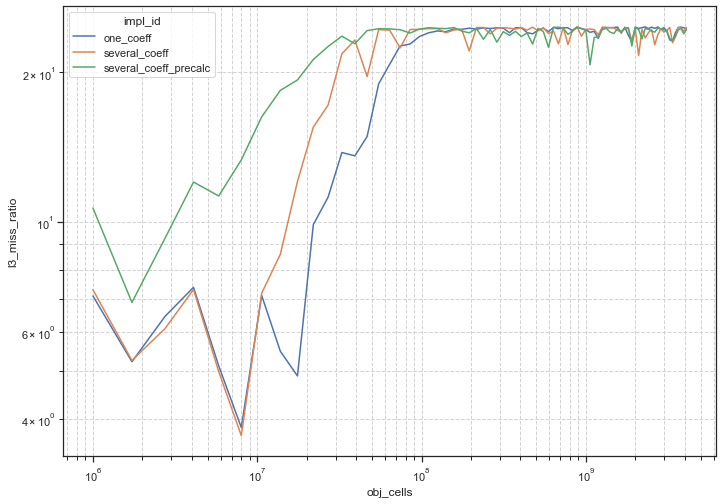

<Figure size 80x80 with 0 Axes>

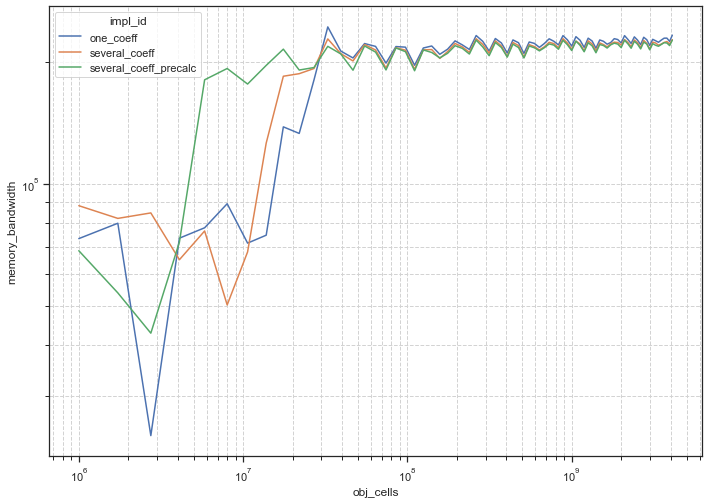

<Figure size 80x80 with 0 Axes>

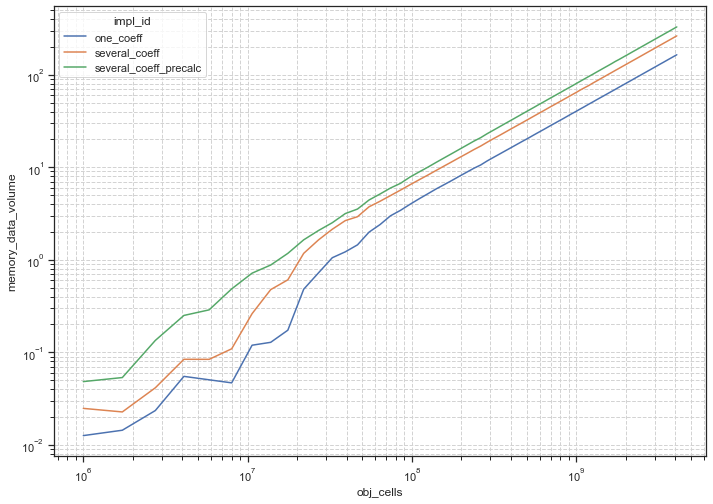

<Figure size 80x80 with 0 Axes>

In [9]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_cells.csv')
data_frame = data_frame[data_frame.threads != 1]
data_frame = data_frame[data_frame.region_id == 'apply']
plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='obj_cells',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True)

#### Memory By Threads

##### [1024 x 1024 x 1024]

node_id             bench_id                impl_id region_id  obj_cols  \
0   gauss3  e_memory_by_threads              one_coeff     apply      1024   
2   gauss3  e_memory_by_threads              one_coeff     apply      1024   
4   gauss3  e_memory_by_threads              one_coeff     apply      1024   
6   gauss3  e_memory_by_threads              one_coeff     apply      1024   
8   gauss3  e_memory_by_threads              one_coeff     apply      1024   
10  gauss3  e_memory_by_threads              one_coeff     apply      1024   
12  gauss3  e_memory_by_threads              one_coeff     apply      1024   
14  gauss3  e_memory_by_threads              one_coeff     apply      1024   
16  gauss3  e_memory_by_threads          several_coeff     apply      1024   
18  gauss3  e_memory_by_threads          several_coeff     apply      1024   
20  gauss3  e_memory_by_threads          several_coeff     apply      1024   
22  gauss3  e_memory_by_threads          several_coeff     apply      1024   
24  gauss3  e_memory_by_threads          several_coeff     apply      1024   
26  gauss3  e_memory_by_threads          several_coeff     apply      1024   
28  gauss3  e_memory_by_threads          several_coeff     apply      1024   
30  gauss3  e_memory_by_threads          several_coeff     apply      1024   
32  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
34  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
36  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
38  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
40  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
42  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
44  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
46  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   

    obj_rows  obj_levels   obj_cells  threads l2d_load_bandwidth  \
0       1024        1024  1073741824        1         28593.4772   
2       1024        1024  1073741824        2         41455.8250   
4       1024        1024  1073741824        4         41127.0639   
6       1024        1024  1073741824        8         41454.4334   
8       1024        1024  1073741824       16         76615.9878   
10      1024        1024  1073741824       32        122547.4553   
12      1024        1024  1073741824       64        243872.9131   
14      1024        1024  1073741824      128        373195.9519   
16      1024        1024  1073741824        1         44386.7451   
18      1024        1024  1073741824        2         83077.2088   
20      1024        1024  1073741824        4        105386.5120   
22      1024        1024  1073741824        8        100693.0075   
24      1024        1024  1073741824       16        188689.1225   
26      1024        1024  1073741824       32        301993.1993   
28      1024        1024  1073741824       64        602632.6733   
30      1024        1024  1073741824      128        937671.4829   
32      1024        1024  1073741824        1         40276.9096   
34      1024        1024  1073741824        2         67747.1715   
36      1024        1024  1073741824        4         75019.6247   
38      1024        1024  1073741824        8         75477.1871   
40      1024        1024  1073741824       16        142443.2517   
42      1024        1024  1073741824       32        231107.1689   
44      1024        1024  1073741824       64        459566.8314   
46      1024        1024  1073741824      128        755217.4345   

    l2d_load_data_volume l2_bandwidth  l2_data_volume  l3_access_bandwidth  \
0                45.3475   28593.4772         45.3475           21840.6858   
2                45.3676   41455.8250         45.3676           31867.7766   
4                45.1530   41127.0639         45.1530           31645.7375   
6                45.5882   41454.4334  

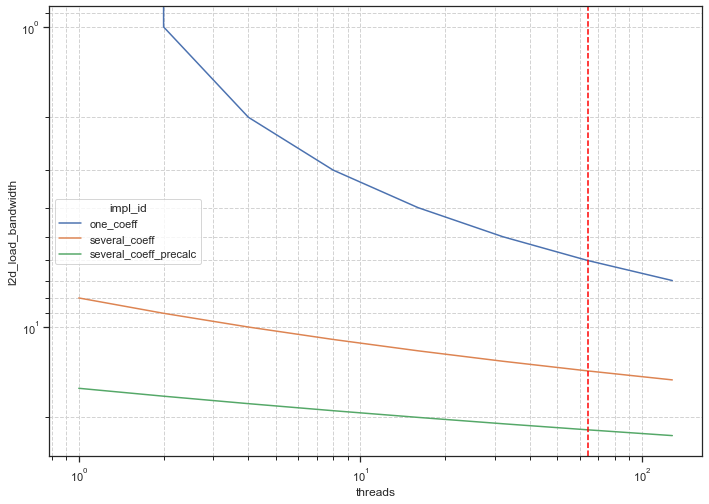

<Figure size 80x80 with 0 Axes>

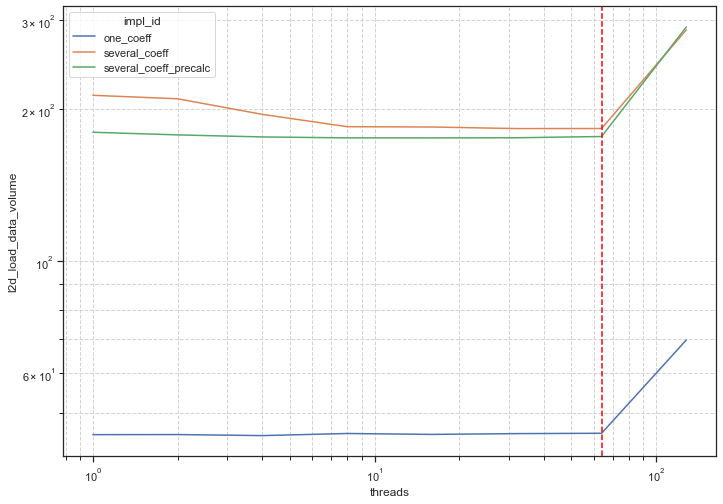

<Figure size 80x80 with 0 Axes>

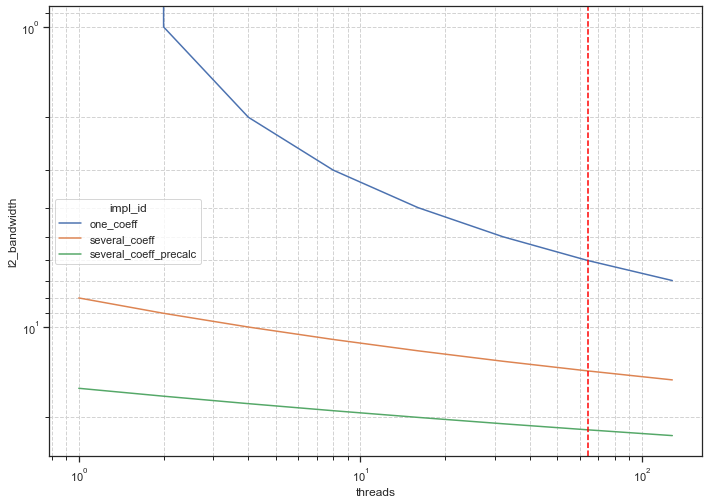

<Figure size 80x80 with 0 Axes>

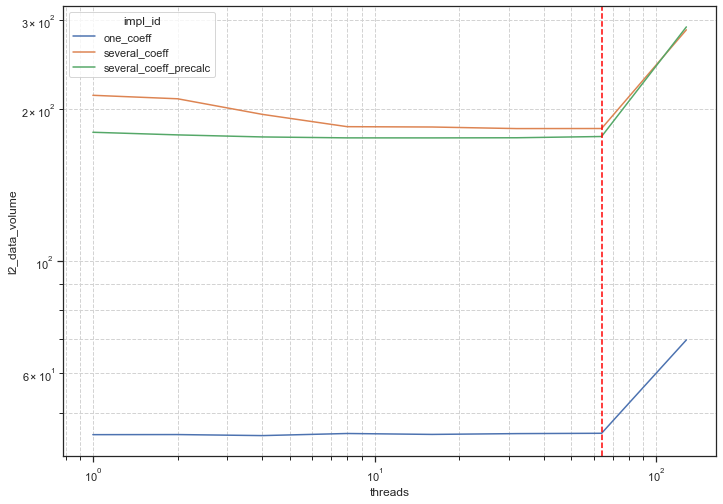

<Figure size 80x80 with 0 Axes>

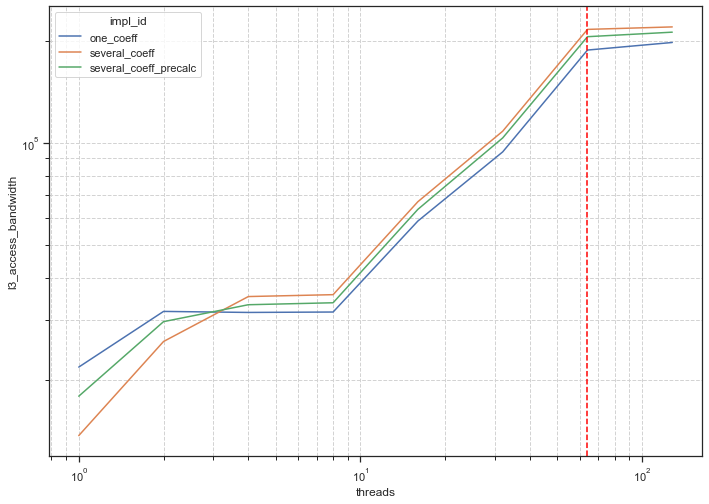

<Figure size 80x80 with 0 Axes>

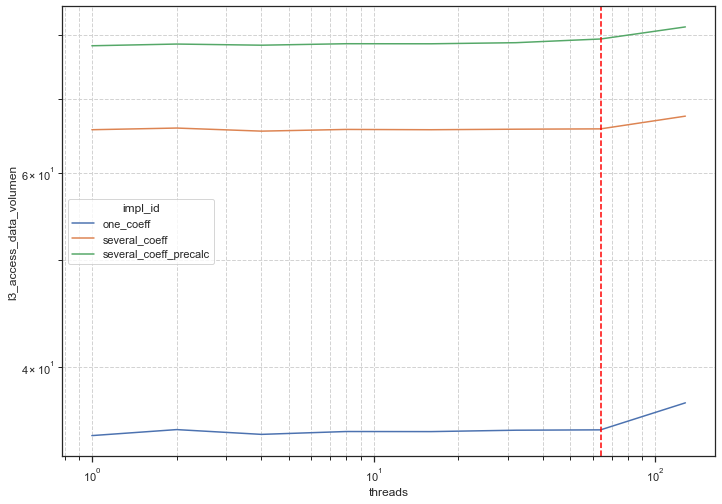

<Figure size 80x80 with 0 Axes>

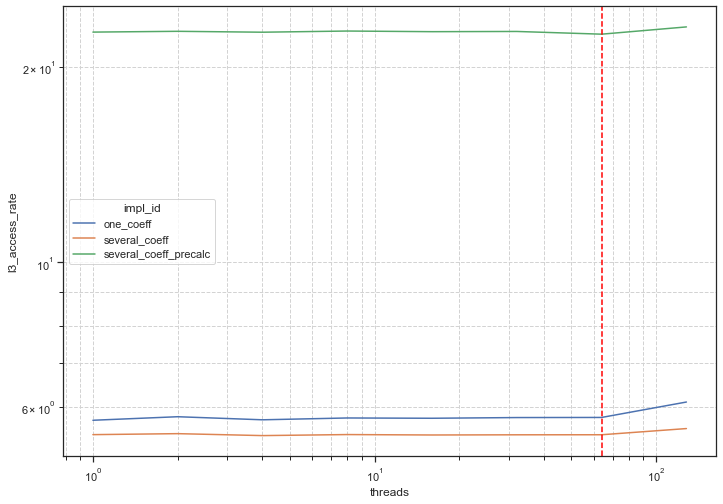

<Figure size 80x80 with 0 Axes>

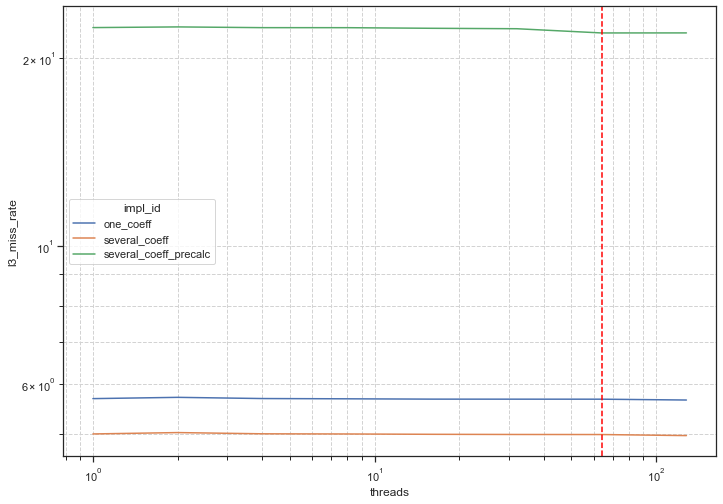

<Figure size 80x80 with 0 Axes>

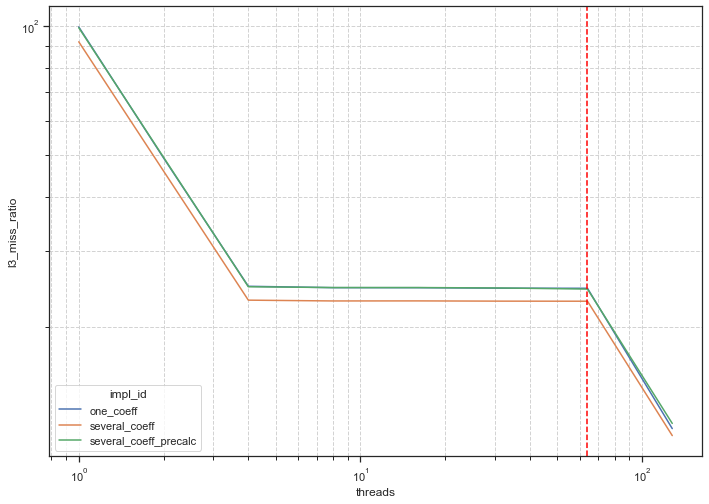

<Figure size 80x80 with 0 Axes>

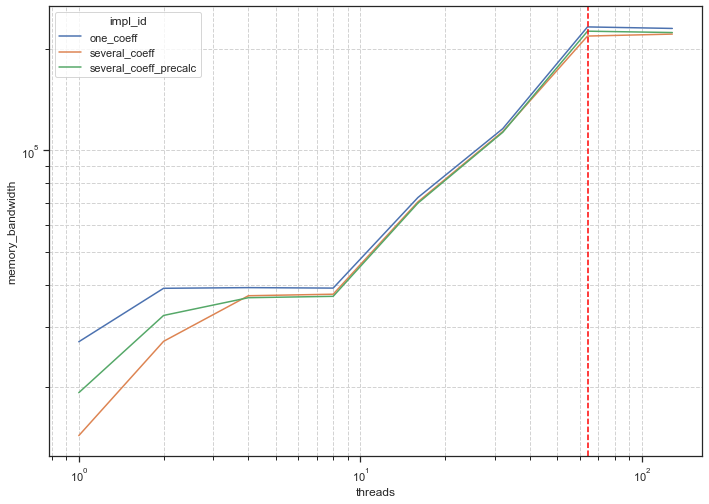

<Figure size 80x80 with 0 Axes>

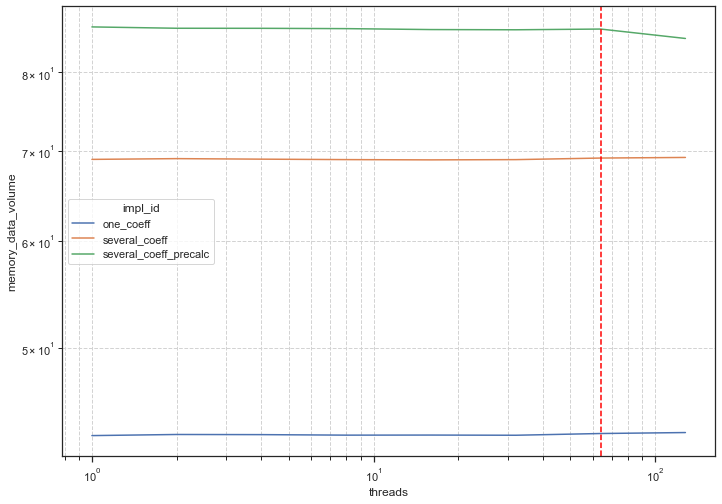

<Figure size 80x80 with 0 Axes>

In [10]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1024]

display(data_frame)

plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)

##### [1600 x 1600 x 1600]

node_id             bench_id                impl_id region_id  obj_cols  \
48  gauss3  e_memory_by_threads              one_coeff     apply      1600   
50  gauss3  e_memory_by_threads              one_coeff     apply      1600   
52  gauss3  e_memory_by_threads              one_coeff     apply      1600   
54  gauss3  e_memory_by_threads              one_coeff     apply      1600   
56  gauss3  e_memory_by_threads              one_coeff     apply      1600   
58  gauss3  e_memory_by_threads              one_coeff     apply      1600   
60  gauss3  e_memory_by_threads              one_coeff     apply      1600   
62  gauss3  e_memory_by_threads              one_coeff     apply      1600   
64  gauss3  e_memory_by_threads          several_coeff     apply      1600   
66  gauss3  e_memory_by_threads          several_coeff     apply      1600   
68  gauss3  e_memory_by_threads          several_coeff     apply      1600   
70  gauss3  e_memory_by_threads          several_coeff     apply      1600   
72  gauss3  e_memory_by_threads          several_coeff     apply      1600   
74  gauss3  e_memory_by_threads          several_coeff     apply      1600   
76  gauss3  e_memory_by_threads          several_coeff     apply      1600   
78  gauss3  e_memory_by_threads          several_coeff     apply      1600   
80  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
82  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
84  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
86  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
88  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
90  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
92  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
94  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   

    obj_rows  obj_levels   obj_cells  threads l2d_load_bandwidth  \
48      1600        1600  4096000000        1         34281.2757   
50      1600        1600  4096000000        2         47865.0718   
52      1600        1600  4096000000        4         47420.6771   
54      1600        1600  4096000000        8         47351.2626   
56      1600        1600  4096000000       16         88306.4691   
58      1600        1600  4096000000       32        140751.3848   
60      1600        1600  4096000000       64        279506.6780   
62      1600        1600  4096000000      128        263248.0988   
64      1600        1600  4096000000        1         30888.1689   
66      1600        1600  4096000000        2         51853.8950   
68      1600        1600  4096000000        4         53200.4394   
70      1600        1600  4096000000        8         53274.1396   
72      1600        1600  4096000000       16        100049.5176   
74      1600        1600  4096000000       32        161056.5008   
76      1600        1600  4096000000       64        328705.9236   
78      1600        1600  4096000000      128        480579.8013   
80      1600        1600  4096000000        1         23182.9073   
82      1600        1600  4096000000        2         38695.6468   
84      1600        1600  4096000000        4         39736.5803   
86      1600        1600  4096000000        8         39681.8453   
88      1600        1600  4096000000       16         77015.3531   
90      1600        1600  4096000000       32        141848.6496   
92      1600        1600  4096000000       64        323266.2842   
94      1600        1600  4096000000      128        502710.9203   

    l2d_load_data_volume l2_bandwidth  l2_data_volume  l3_access_bandwidth  \
48              198.7433   34281.2757        198.7433           22942.8693   
50              199.4404   47865.0718        199.4404           32109.4918   
52              198.5690   47420.6771        198.5690           31490.5648   
54              198.2381   47351.2626  

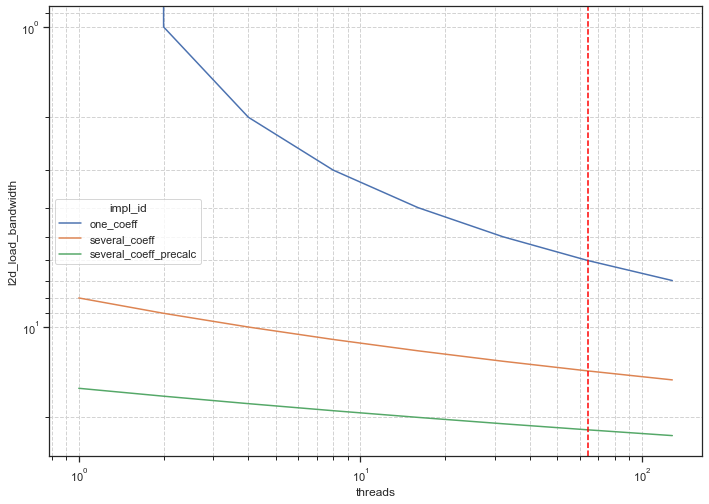

<Figure size 80x80 with 0 Axes>

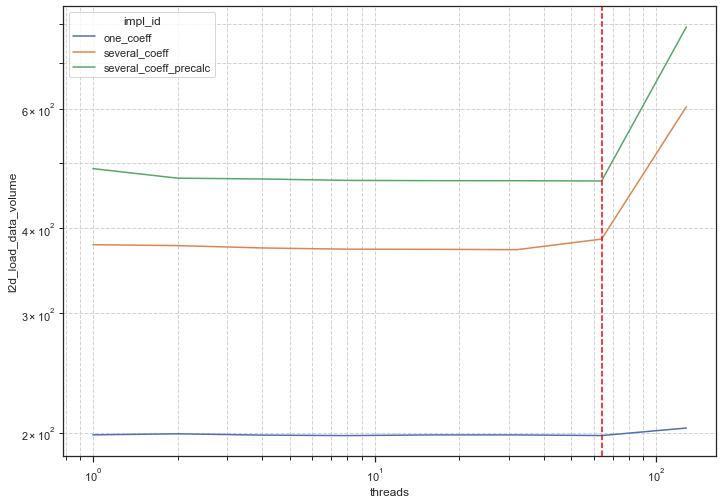

<Figure size 80x80 with 0 Axes>

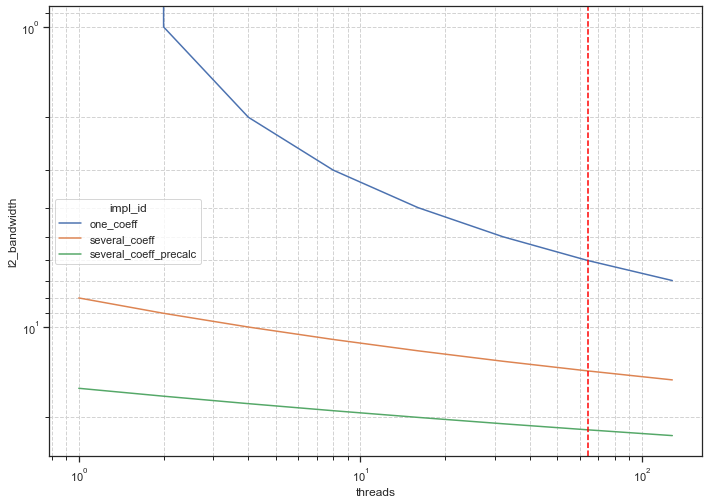

<Figure size 80x80 with 0 Axes>

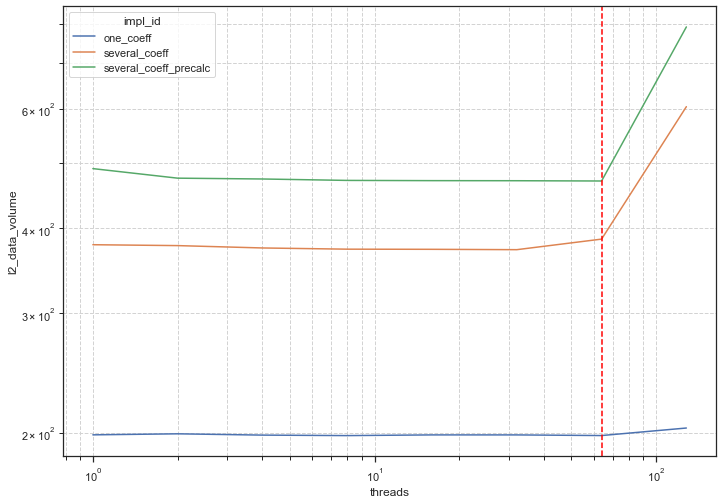

<Figure size 80x80 with 0 Axes>

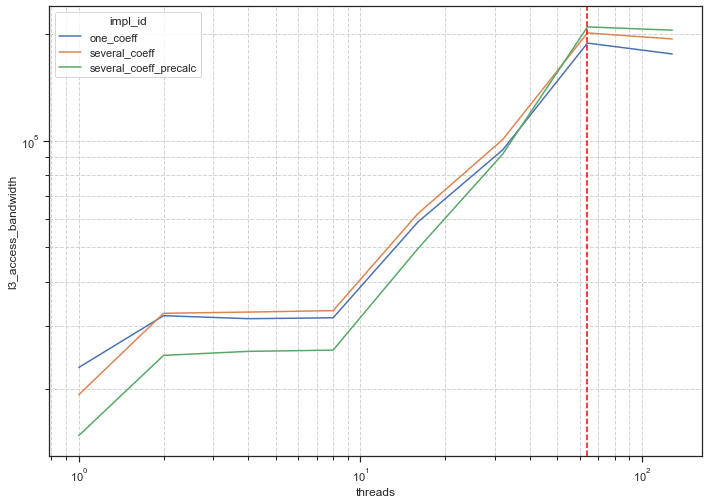

<Figure size 80x80 with 0 Axes>

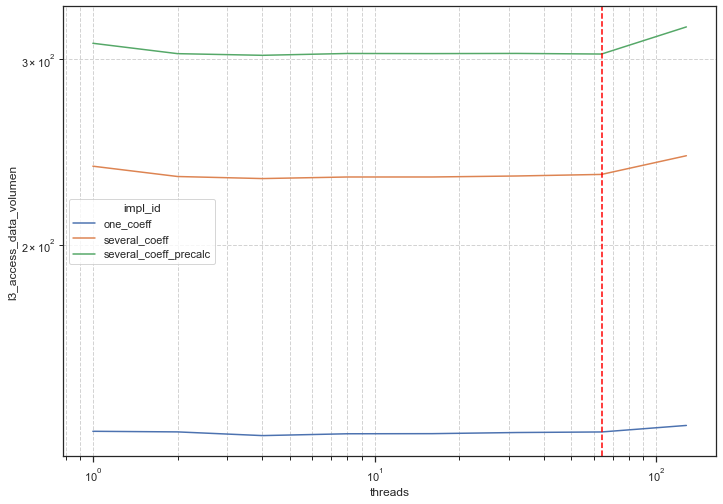

<Figure size 80x80 with 0 Axes>

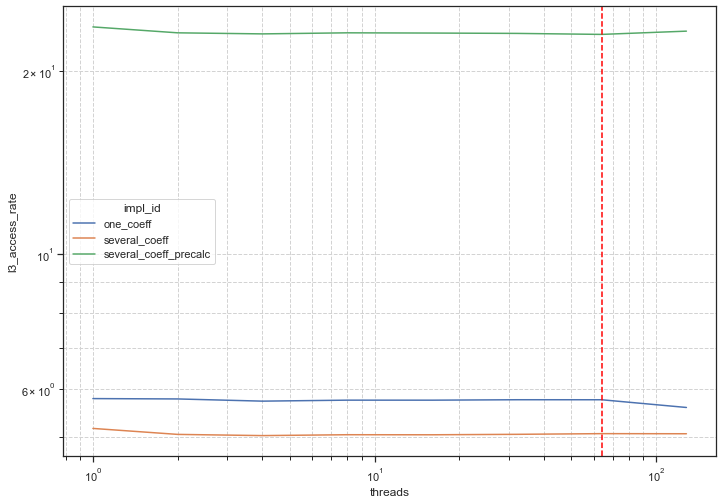

<Figure size 80x80 with 0 Axes>

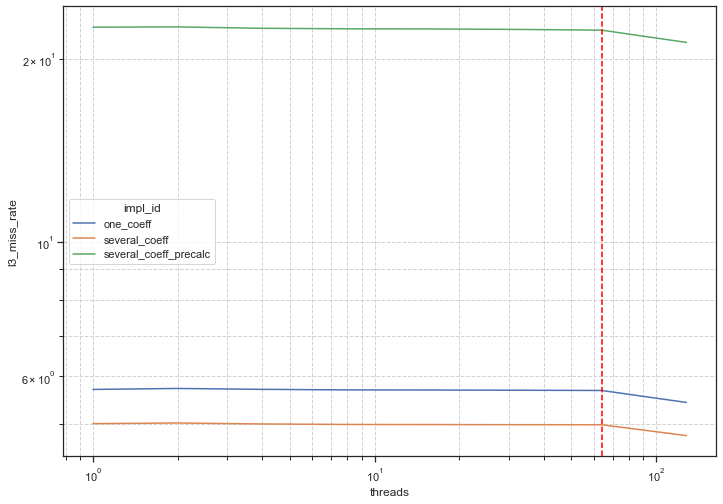

<Figure size 80x80 with 0 Axes>

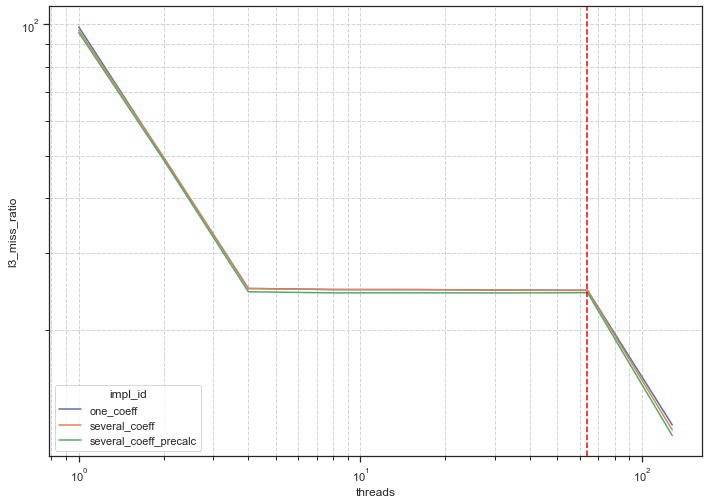

<Figure size 80x80 with 0 Axes>

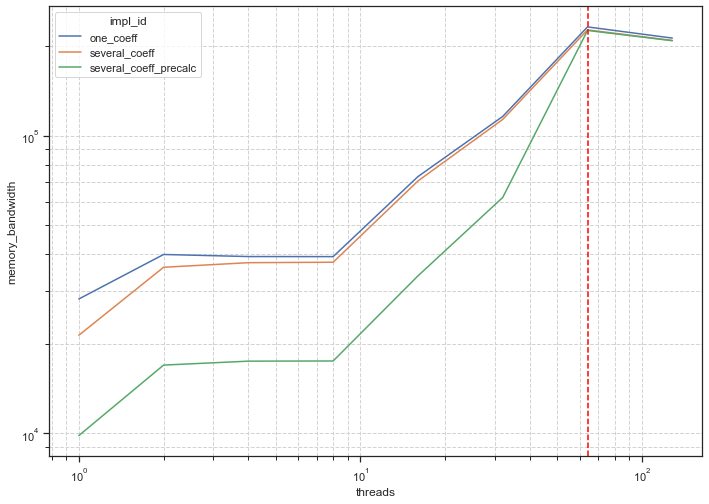

<Figure size 80x80 with 0 Axes>

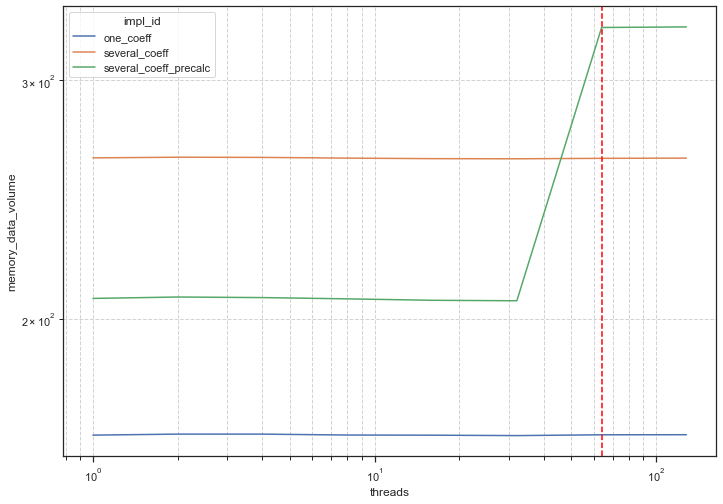

<Figure size 80x80 with 0 Axes>

In [11]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.obj_cols == 1600]

display(data_frame)

plot(p_data=data_frame,
    p_yId='l2d_load_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2d_load_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l2_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_data_volumen',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_access_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_rate',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='l3_miss_ratio',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='memory_data_volume',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)

##### [1024 x 1024 x 1024] vs [1600 x 1600 x 1600]

node_id             bench_id                impl_id region_id  obj_cols  \
0   gauss3  e_memory_by_threads              one_coeff     apply      1024   
2   gauss3  e_memory_by_threads              one_coeff     apply      1024   
4   gauss3  e_memory_by_threads              one_coeff     apply      1024   
6   gauss3  e_memory_by_threads              one_coeff     apply      1024   
8   gauss3  e_memory_by_threads              one_coeff     apply      1024   
10  gauss3  e_memory_by_threads              one_coeff     apply      1024   
12  gauss3  e_memory_by_threads              one_coeff     apply      1024   
14  gauss3  e_memory_by_threads              one_coeff     apply      1024   
16  gauss3  e_memory_by_threads          several_coeff     apply      1024   
18  gauss3  e_memory_by_threads          several_coeff     apply      1024   
20  gauss3  e_memory_by_threads          several_coeff     apply      1024   
22  gauss3  e_memory_by_threads          several_coeff     apply      1024   
24  gauss3  e_memory_by_threads          several_coeff     apply      1024   
26  gauss3  e_memory_by_threads          several_coeff     apply      1024   
28  gauss3  e_memory_by_threads          several_coeff     apply      1024   
30  gauss3  e_memory_by_threads          several_coeff     apply      1024   
32  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
34  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
36  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
38  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
40  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
42  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
44  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
46  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1024   
48  gauss3  e_memory_by_threads              one_coeff     apply      1600   
50  gauss3  e_memory_by_threads              one_coeff     apply      1600   
52  gauss3  e_memory_by_threads              one_coeff     apply      1600   
54  gauss3  e_memory_by_threads              one_coeff     apply      1600   
56  gauss3  e_memory_by_threads              one_coeff     apply      1600   
58  gauss3  e_memory_by_threads              one_coeff     apply      1600   
60  gauss3  e_memory_by_threads              one_coeff     apply      1600   
62  gauss3  e_memory_by_threads              one_coeff     apply      1600   
64  gauss3  e_memory_by_threads          several_coeff     apply      1600   
66  gauss3  e_memory_by_threads          several_coeff     apply      1600   
68  gauss3  e_memory_by_threads          several_coeff     apply      1600   
70  gauss3  e_memory_by_threads          several_coeff     apply      1600   
72  gauss3  e_memory_by_threads          several_coeff     apply      1600   
74  gauss3  e_memory_by_threads          several_coeff     apply      1600   
76  gauss3  e_memory_by_threads          several_coeff     apply      1600   
78  gauss3  e_memory_by_threads          several_coeff     apply      1600   
80  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
82  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
84  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
86  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
88  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
90  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
92  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   
94  gauss3  e_memory_by_threads  several_coeff_precalc     apply      1600   

    obj_rows  obj_levels   obj_cells  threads l2d_load_bandwidth  \
0       1024        1024  1073741824        1         28593.4772   
2       1024        1024  1073741824        

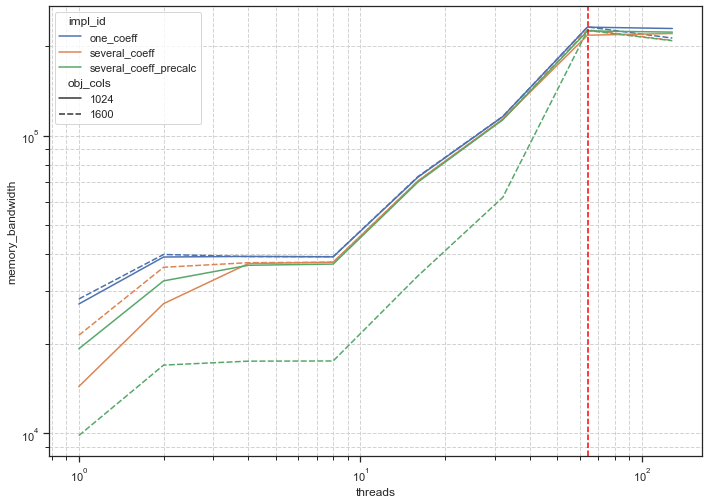

<Figure size 80x80 with 0 Axes>

In [12]:
import pandas as pd

data_frame = pd.read_csv('./e_memory_by_threads.csv')
data_frame = data_frame[data_frame.region_id == 'apply']

display(data_frame)

plot(p_data=data_frame,
    p_yId='memory_bandwidth',
    p_xId='threads',
    p_hueId='impl_id',
    p_styleId='obj_cols',
    p_logScale=True,
    p_core_marker=True)